<a href="https://colab.research.google.com/github/JakeOh/202110_itw_lab_python/blob/main/py22_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 라이브러리 모듈(Python 파일) 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips 데이터 셋

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

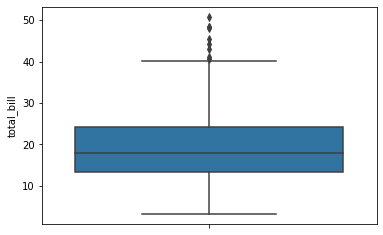

In [4]:
# total_bill box plot
sns.boxplot(y='total_bill', data=tips)
plt.show()

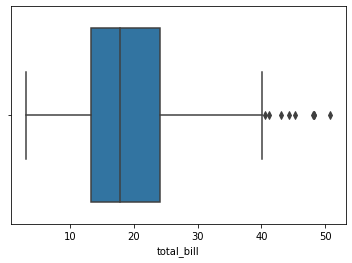

In [6]:
sns.boxplot(x='total_bill', data=tips)
plt.show()

성별 tip의 분포 시각화

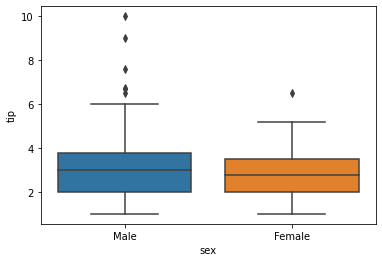

In [9]:
sns.boxplot(y='tip', data=tips, x='sex')
plt.show()

In [10]:
tip_male = tips[tips['sex'] == 'Male']
tip_male['tip'].describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [11]:
tip_female = tips[tips['sex'] == 'Female']
tip_female['tip'].describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

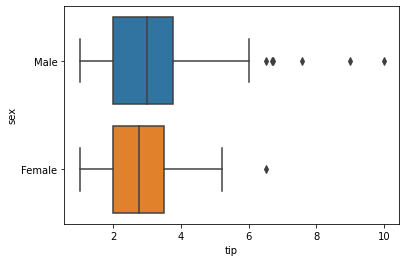

In [12]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

요일별 tip의 box plot

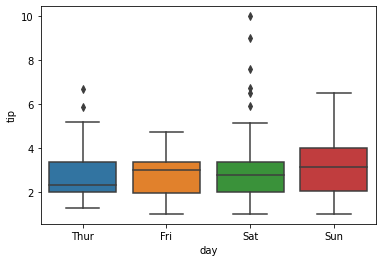

In [13]:
sns.boxplot(x='day', y= 'tip', data=tips)
plt.show()

* subplot 2개(1x2)를 생성
* 흡연여부별, 시간별 boxplot

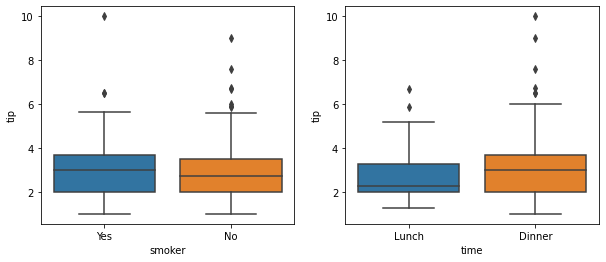

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

sns.boxplot(x='smoker', y='tip', data=tips, ax=ax[0])
sns.boxplot(x='time', y='tip', data=tips, ax=ax[1])

plt.show()

# Histogram

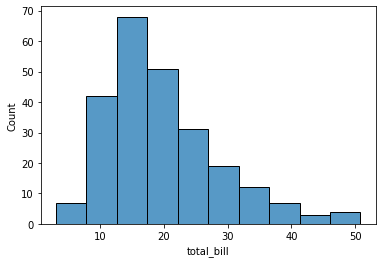

In [21]:
# total_bill histogram
sns.histplot(data=tips, x='total_bill', bins=10)
plt.show()

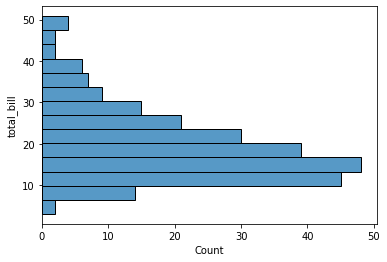

In [22]:
sns.histplot(data=tips, y='total_bill')
plt.show()

# Bar plot

## `countplot()`

카테고리 타입 변수의 빈도수(count)를 막대로 표현한 그래프

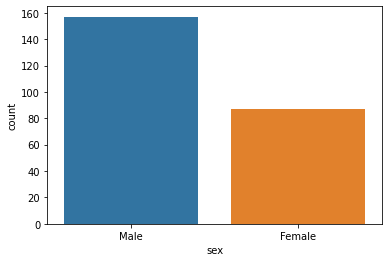

In [23]:
# 남성/여성 수 - 세로 막대 그래프
sns.countplot(data=tips, x='sex')
plt.show()

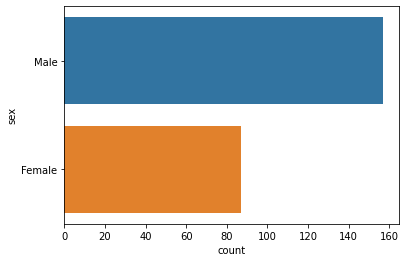

In [24]:
sns.countplot(data=tips, y='sex')
plt.show()

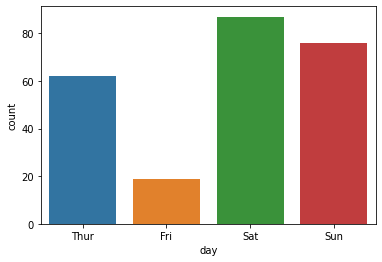

In [25]:
# 요일의 빈도수
sns.countplot(x='day', data=tips)
plt.show()

In [28]:
# 요일별 성별 빈도수
tips.groupby(by=['day', 'sex'])['tip'].count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

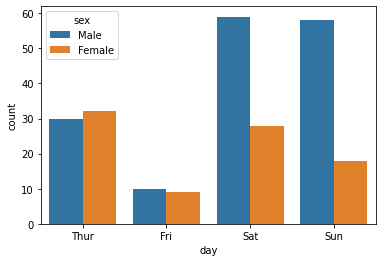

In [29]:
sns.countplot(x='day', hue='sex', data=tips)
#> hue=채우기 색깔. 막대를 채우는 색깔을 '성별'에 따라서 다르게 함.
plt.show()

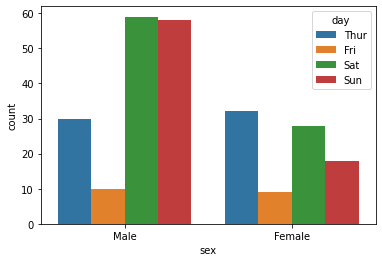

In [30]:
sns.countplot(x='sex', hue='day', data=tips)
plt.show()

In [31]:
# 성별, 흡연여부 빈도수
tips.groupby(by=['sex', 'smoker'])['tip'].count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

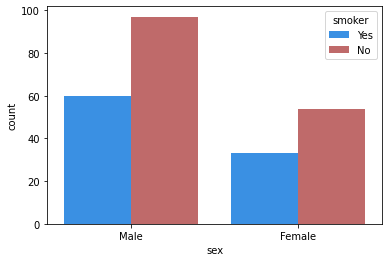

In [33]:
sns.countplot(x='sex', hue='smoker', data=tips,
              palette=['dodgerblue', 'indianred'])
plt.show()

## `barplot()`

* 그룹별 변수(컬럼)의 통계량(예: 평균, 중앙값, ...)을 막대로 시각화
* 카테고리 타입 변수와 연속형 변수를 함께 시각화

In [34]:
# 성별 tip의 평균
tips.groupby(by='sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

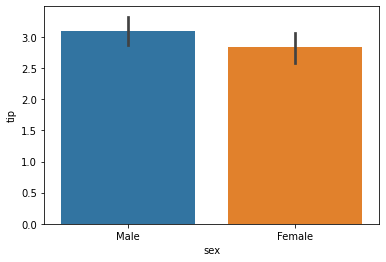

In [35]:
sns.barplot(x='sex', y='tip', data=tips)  # estimator=np.mean -> 막대의 높이는 평균값.
plt.show()

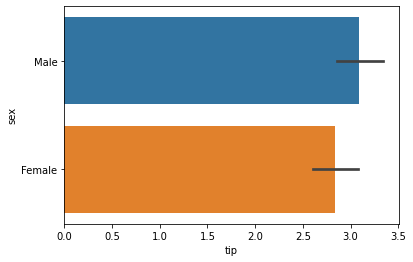

In [36]:
sns.barplot(x='tip', y='sex', data=tips)
plt.show()

In [37]:
# 성별 tip의 최댓값
tips.groupby(by='sex')['tip'].max()

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

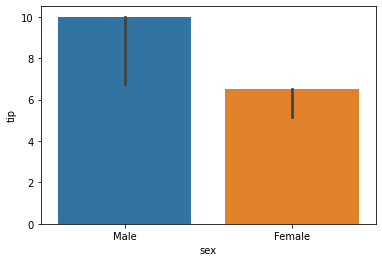

In [40]:
sns.barplot(x='sex', y='tip', data=tips, estimator=np.max)
plt.show()

In [41]:
# 요일별, 성별 tip의 평균
tips.groupby(by=['day', 'sex'])['tip'].mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

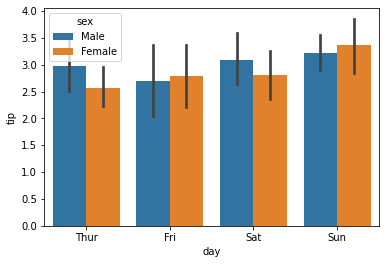

In [42]:
sns.barplot(x='day', y='tip', hue='sex', data=tips)
plt.show()

In [43]:
tips.groupby(by=['sex', 'day'])['tip'].mean()

sex     day 
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Name: tip, dtype: float64

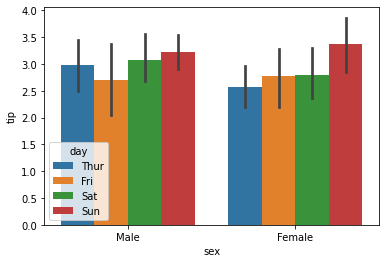

In [44]:
sns.barplot(x='sex', y='tip', hue='day', data=tips)
plt.show()

# Scatter plot

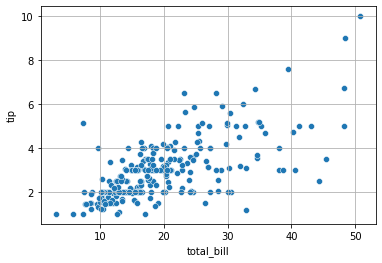

In [51]:
# tip ~ total_bill
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.grid()
plt.show()

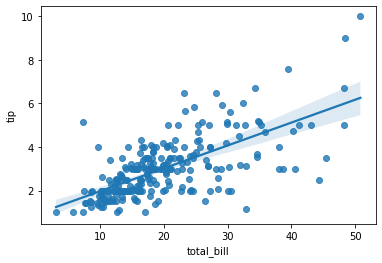

In [52]:
# regplot: regression plot(회귀 그래프). 산점도 + 선형 회귀 직선.
sns.regplot(x='total_bill', y='tip', data=tips)
plt.show()

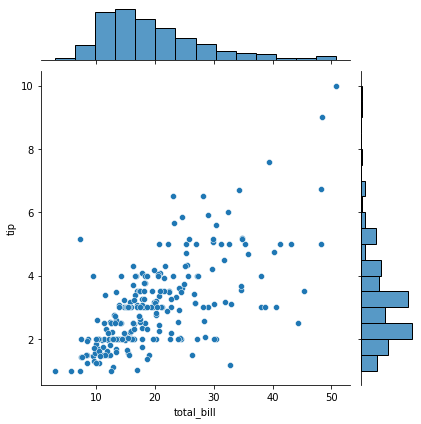

In [53]:
# jointplot: 산점도 + 히스토그램
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

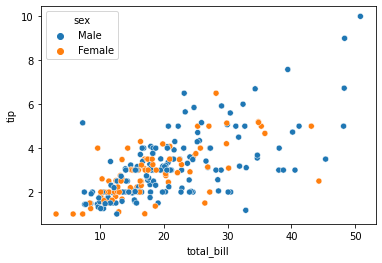

In [54]:
# tip ~ total_bill 산점도 + 점의 색깔을 성별(grouping)에 따라서 다르게 시각화
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.show()

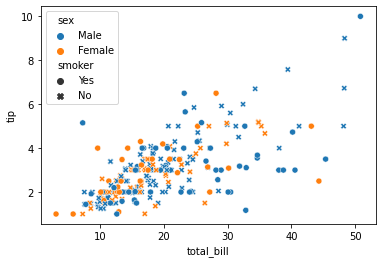

In [56]:
# tip ~ total_bill 산점도 + 색깔은 성별에 따라서 + 모양을 흡연여부에 따라서 다르게
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='sex', style='smoker')
plt.show()

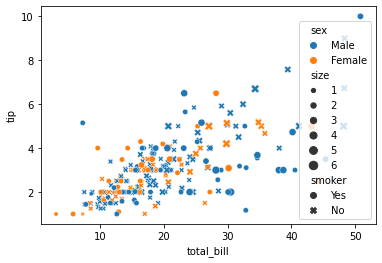

In [57]:
# tip ~ total_bill 산점도 + 색깔은 성별에 따라서 + 모양을 흡연여부 + 크기는 인원수에 따라서 다르게
sns.scatterplot(x='total_bill', y='tip', data=tips,
                hue='sex', style='smoker', size='size')
plt.show()

# Line plot

In [58]:
np.random.seed(1)
df = pd.DataFrame(data={'x': np.arange(10),
                        'y': np.random.rand(10)})
df

,x,y
0,0,0.417022
1,1,0.720324
2,2,0.000114
3,3,0.302333
4,4,0.146756
5,5,0.092339
6,6,0.186260
7,7,0.345561
8,8,0.396767
9,9,0.538817


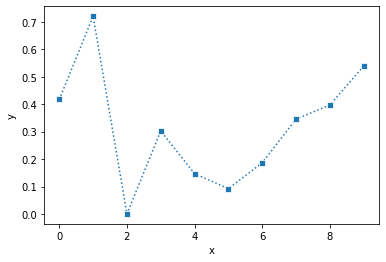

In [62]:
sns.lineplot(x='x', y='y', data=df, marker='s', linestyle=':')
plt.show()

# Category plot

카테고리별로 subplot을 생성하고 통계값(평균, 중앙값, ...)을 계산해서, 각각의 subplot에 같은 종류의 그래프들을 시각화.

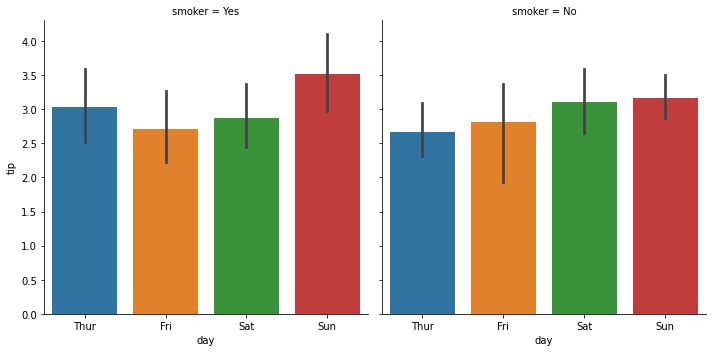

In [66]:
# 요일별 팁의 평균 막대 그래프 + 흡연 여부별 subplot
sns.catplot(x='day', y='tip', data=tips, kind='bar',
            col='smoker')
plt.show()

In [67]:
tips.groupby(by=['smoker', 'day'])['tip'].mean()

smoker  day 
Yes     Thur    3.030000
        Fri     2.714000
        Sat     2.875476
        Sun     3.516842
No      Thur    2.673778
        Fri     2.812500
        Sat     3.102889
        Sun     3.167895
Name: tip, dtype: float64

In [ ]:
# 요일별 팁의 평균 막대 그래프 + 시간별 subplot

In [ ]:
# 요일별 팁의 평균 막대 그래프 + 흡연여부별 subplot + 시간별 subplot